In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,LabelEncoder  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklea
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.shape

(1470, 35)

In [5]:
df[df.columns].nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [7]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns

In [8]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])


In [10]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,0,2,613,1,6,1,3,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,0,2,155,1,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,0,1,1023,2,2,3,3,1,2065,...,4,80,0,17,3,2,9,6,0,8


**Creating a distribution plot**

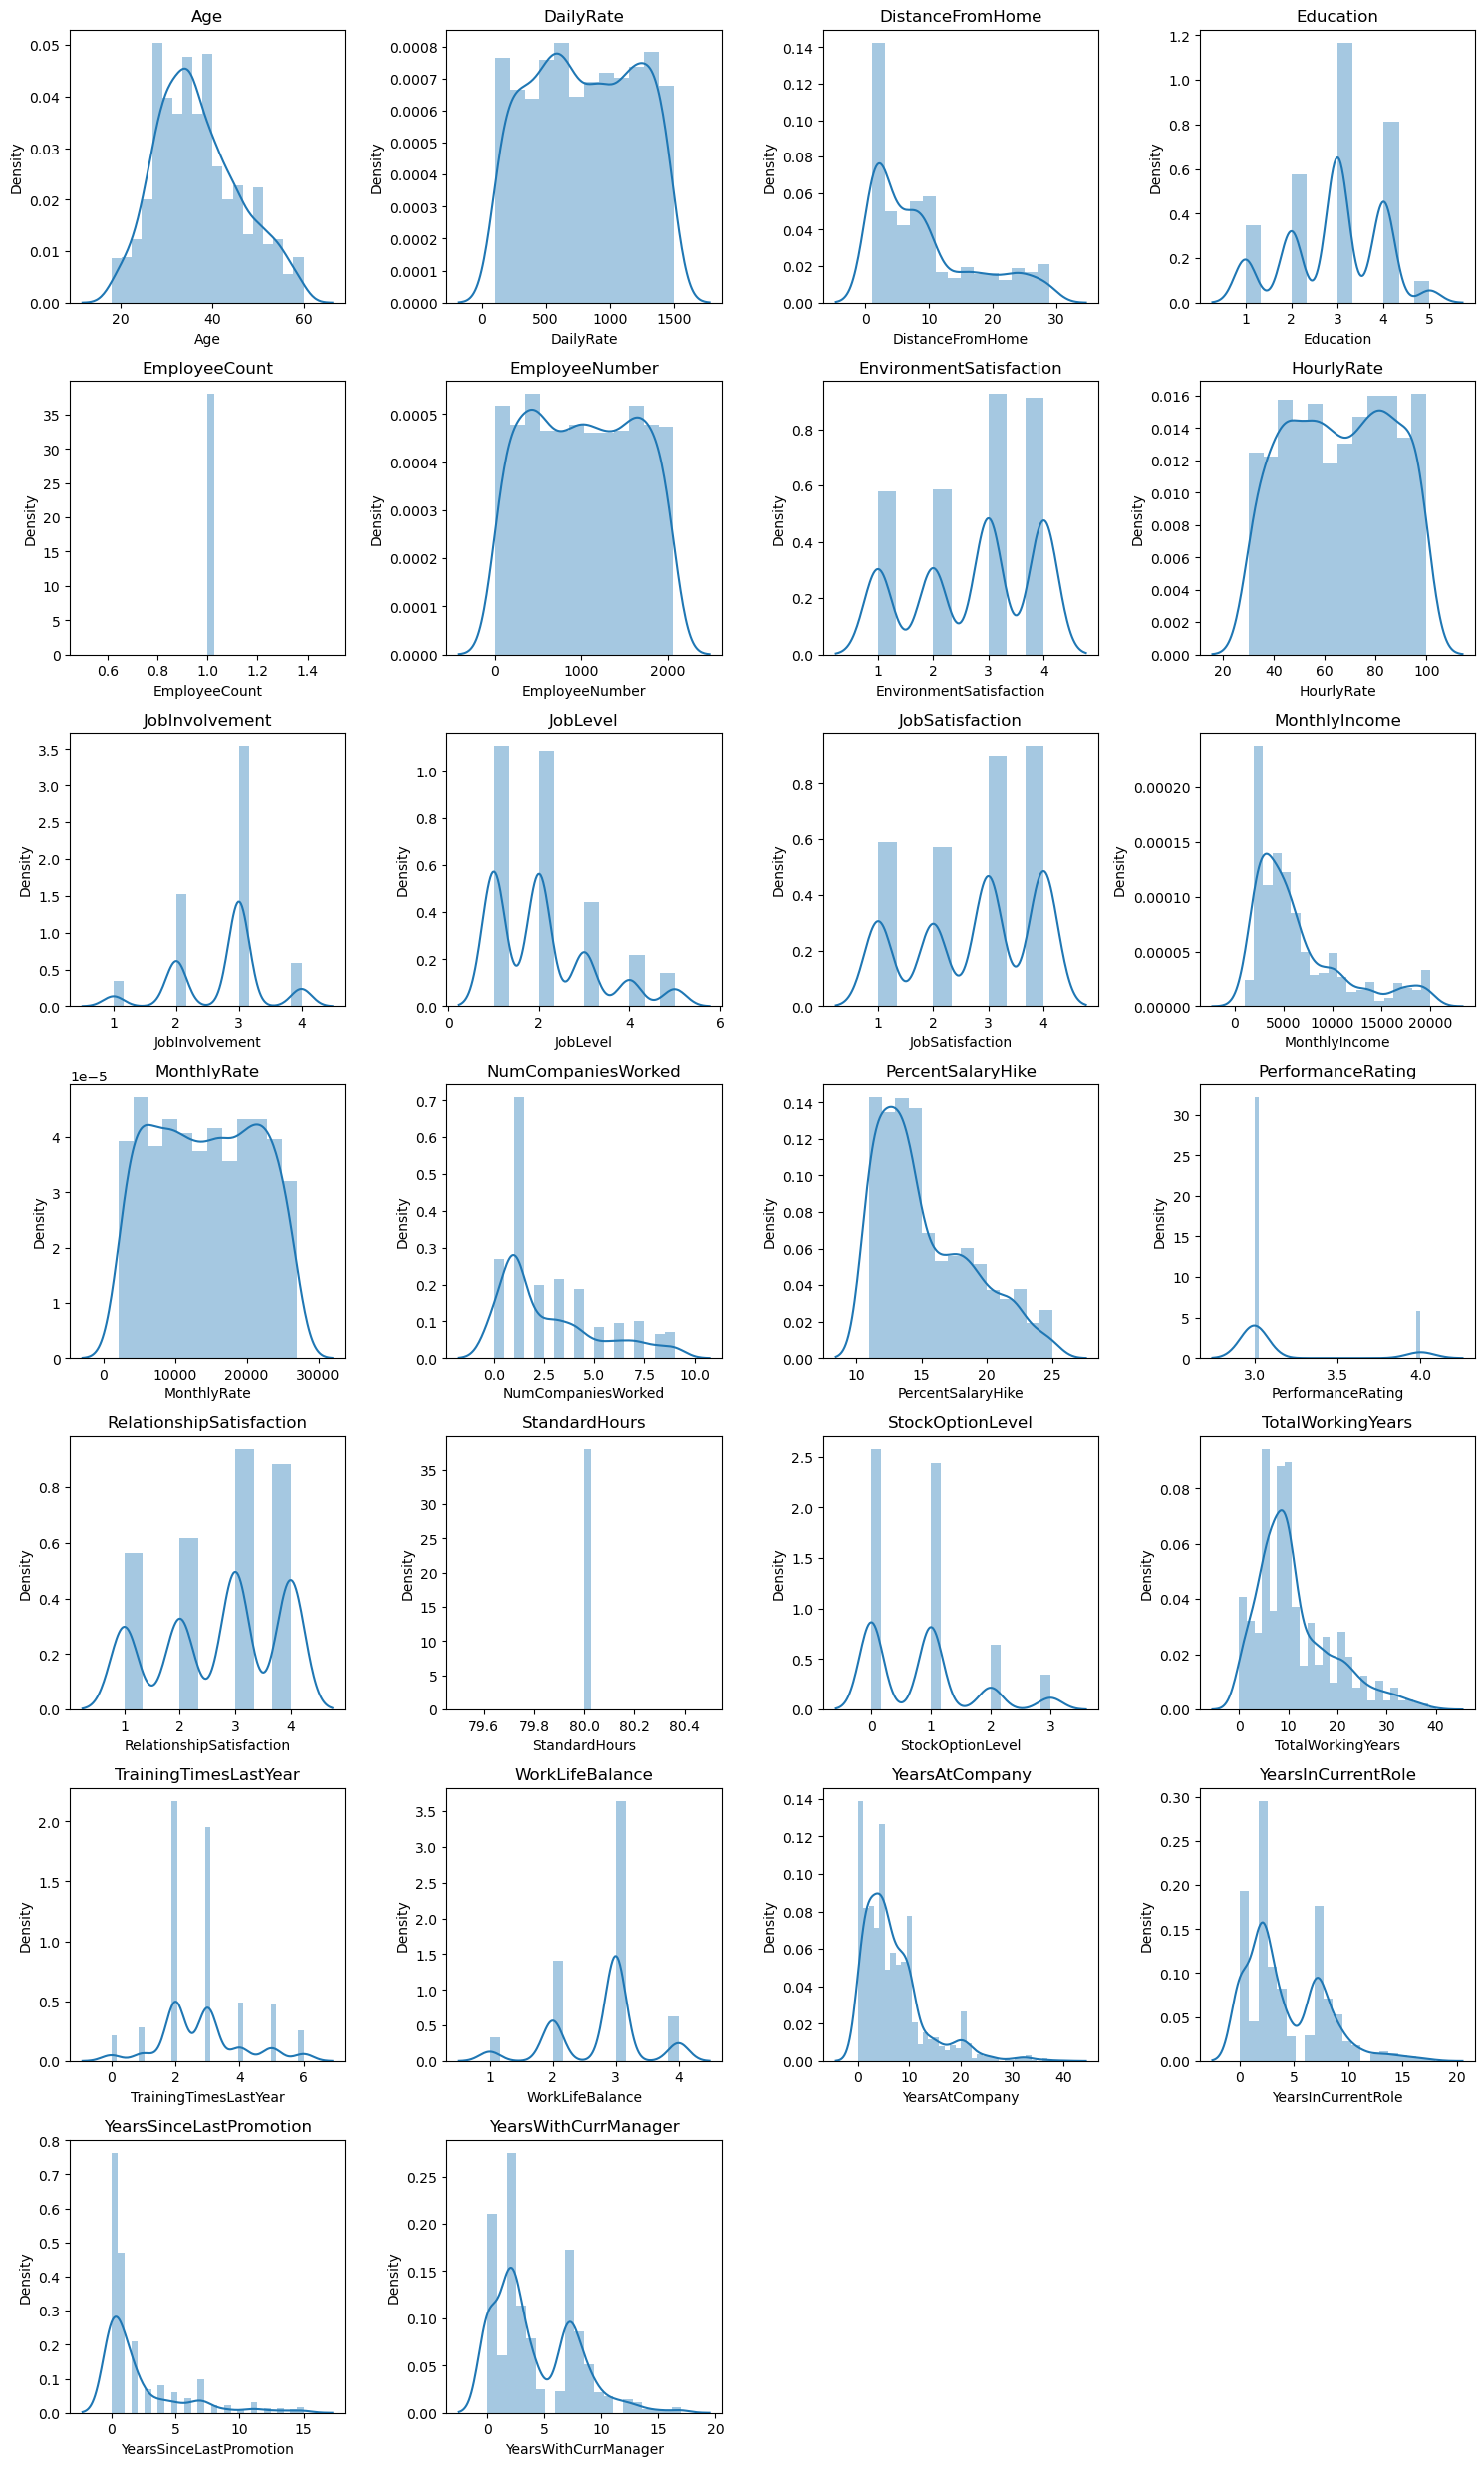

In [11]:
plt.figure(figsize=(15,35))
for i,column in enumerate(num_col):
    plt.subplot(10,4,i+1)
    plt.title(column)
    sns.distplot(df[column])
plt.tight_layout()
plt.show()

In [12]:
df["StandardHours"].value_counts().reset_index()

,StandardHours,count
0,80,1470


In [13]:
df.drop('StandardHours',axis=1,inplace=True)

**plotting a hostogram**

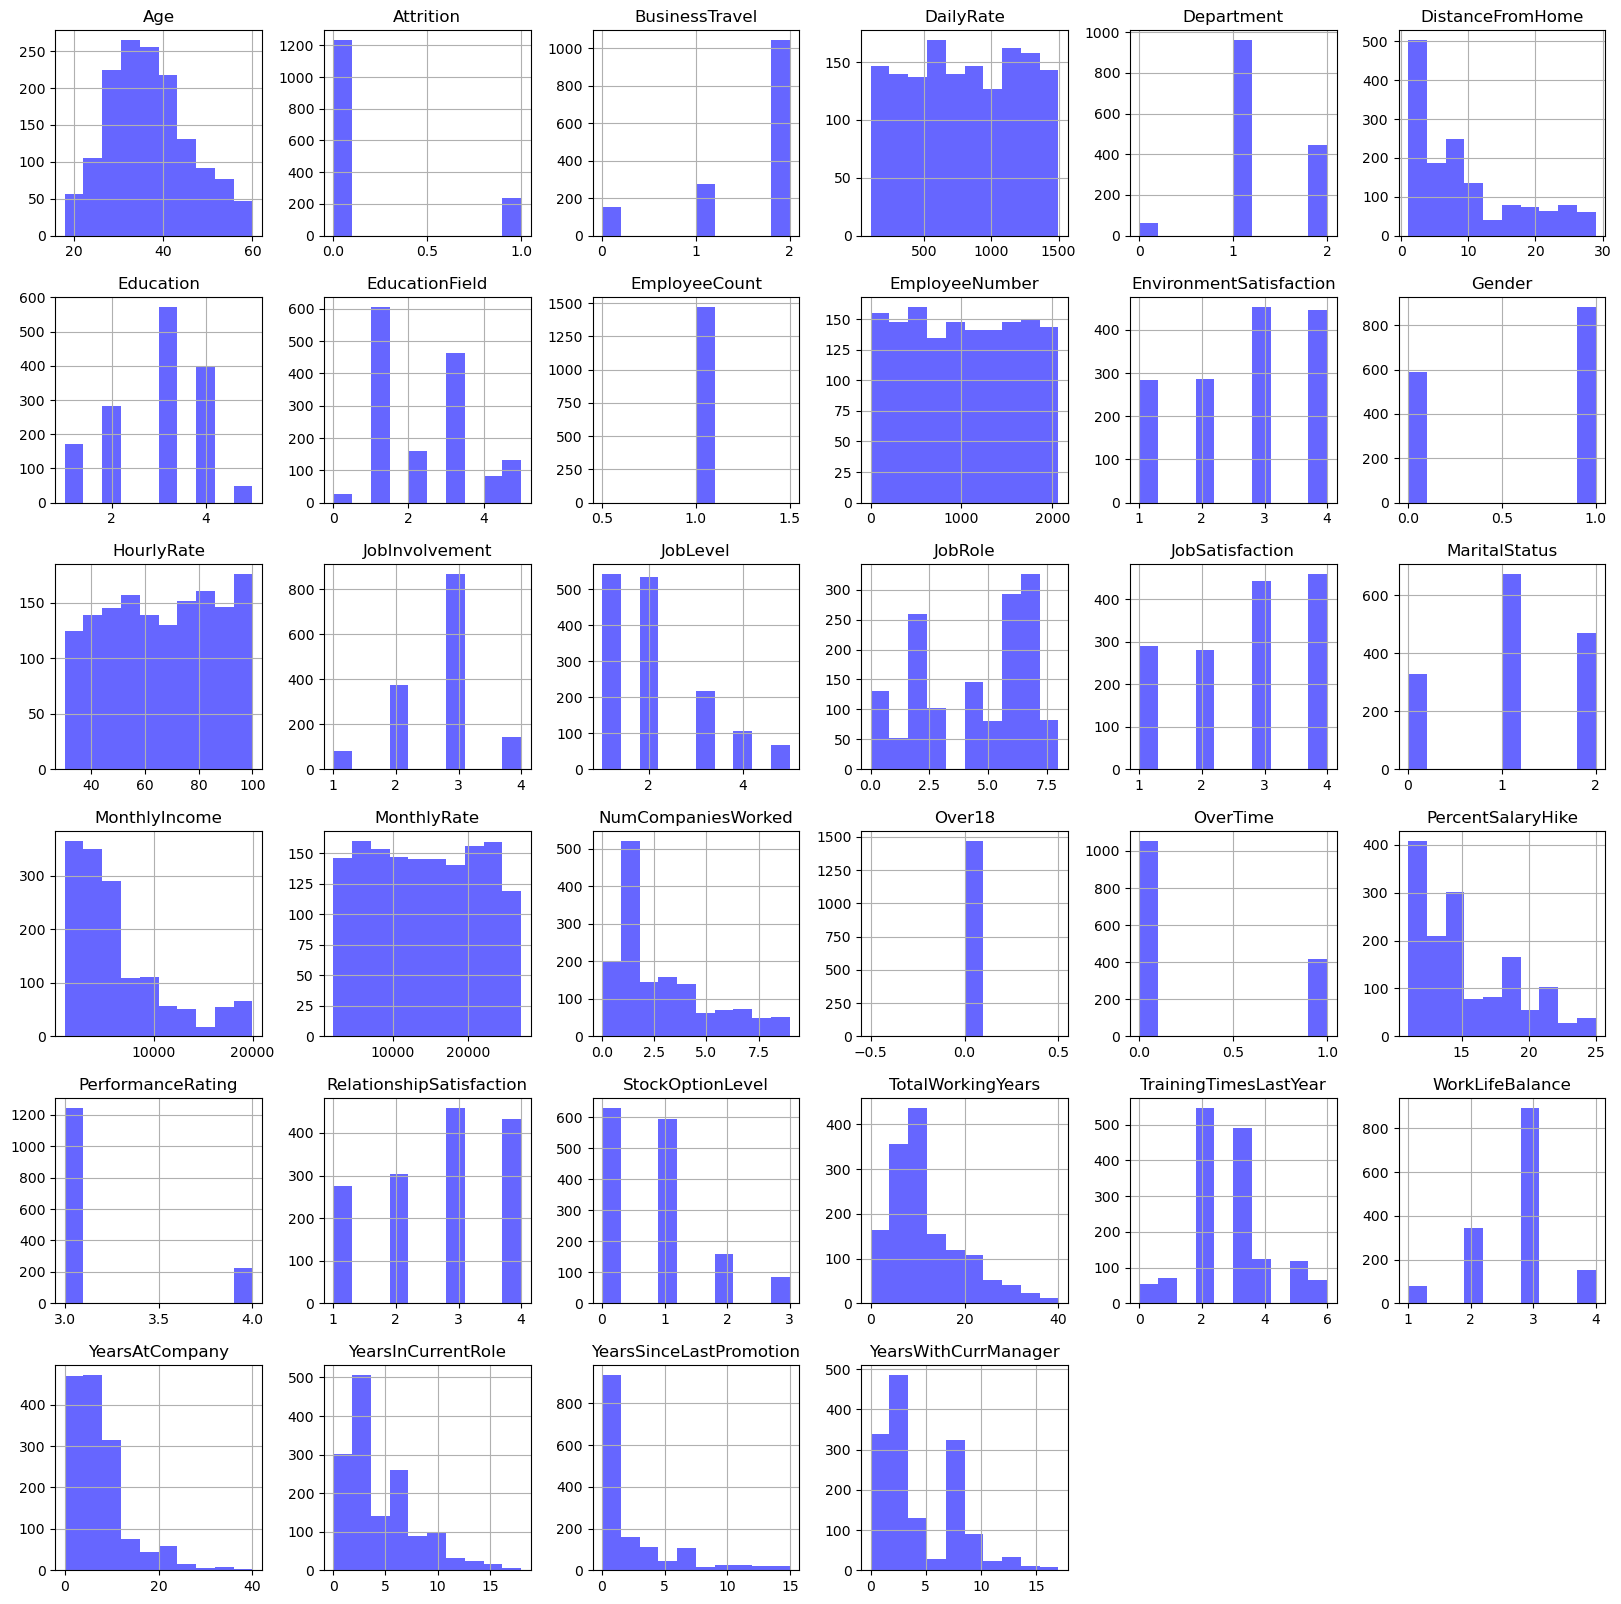

In [14]:
df.hist(figsize=(20, 20), color='b', alpha=0.6)
plt.show()

**Correlation Matrix**

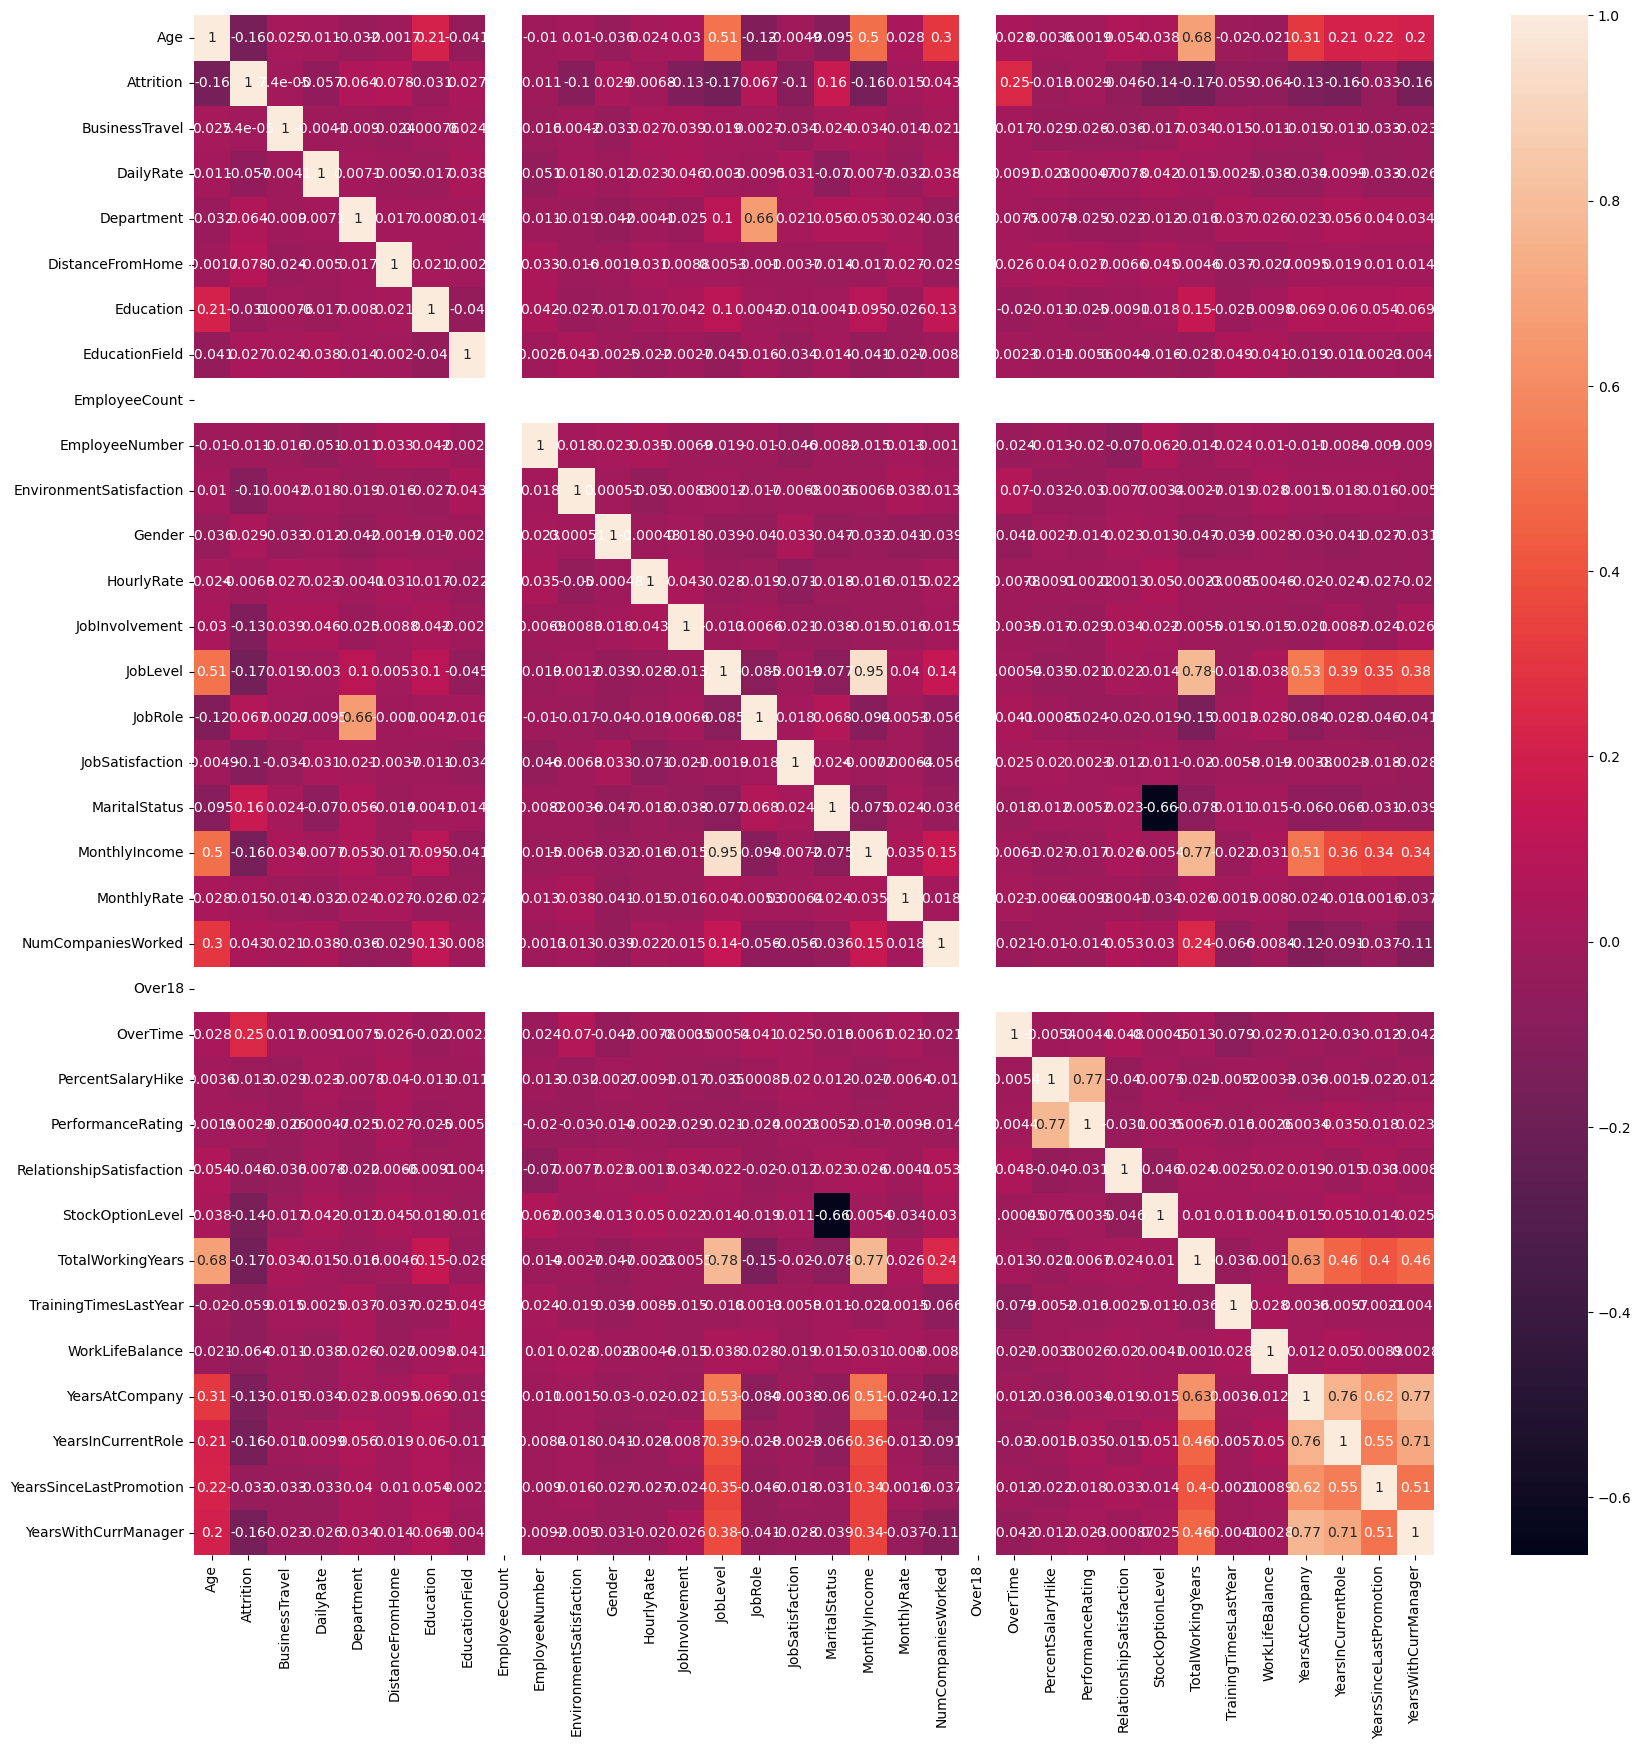

In [15]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)
plt.show()

In [16]:
df['EmployeeCount'].value_counts()

EmployeeCount
1    1470
Name: count, dtype: int64

In [17]:
df['Over18'].value_counts()

Over18
0    1470
Name: count, dtype: int64

In [18]:
df.drop(['EmployeeCount','Over18'],axis=1,inplace=True)

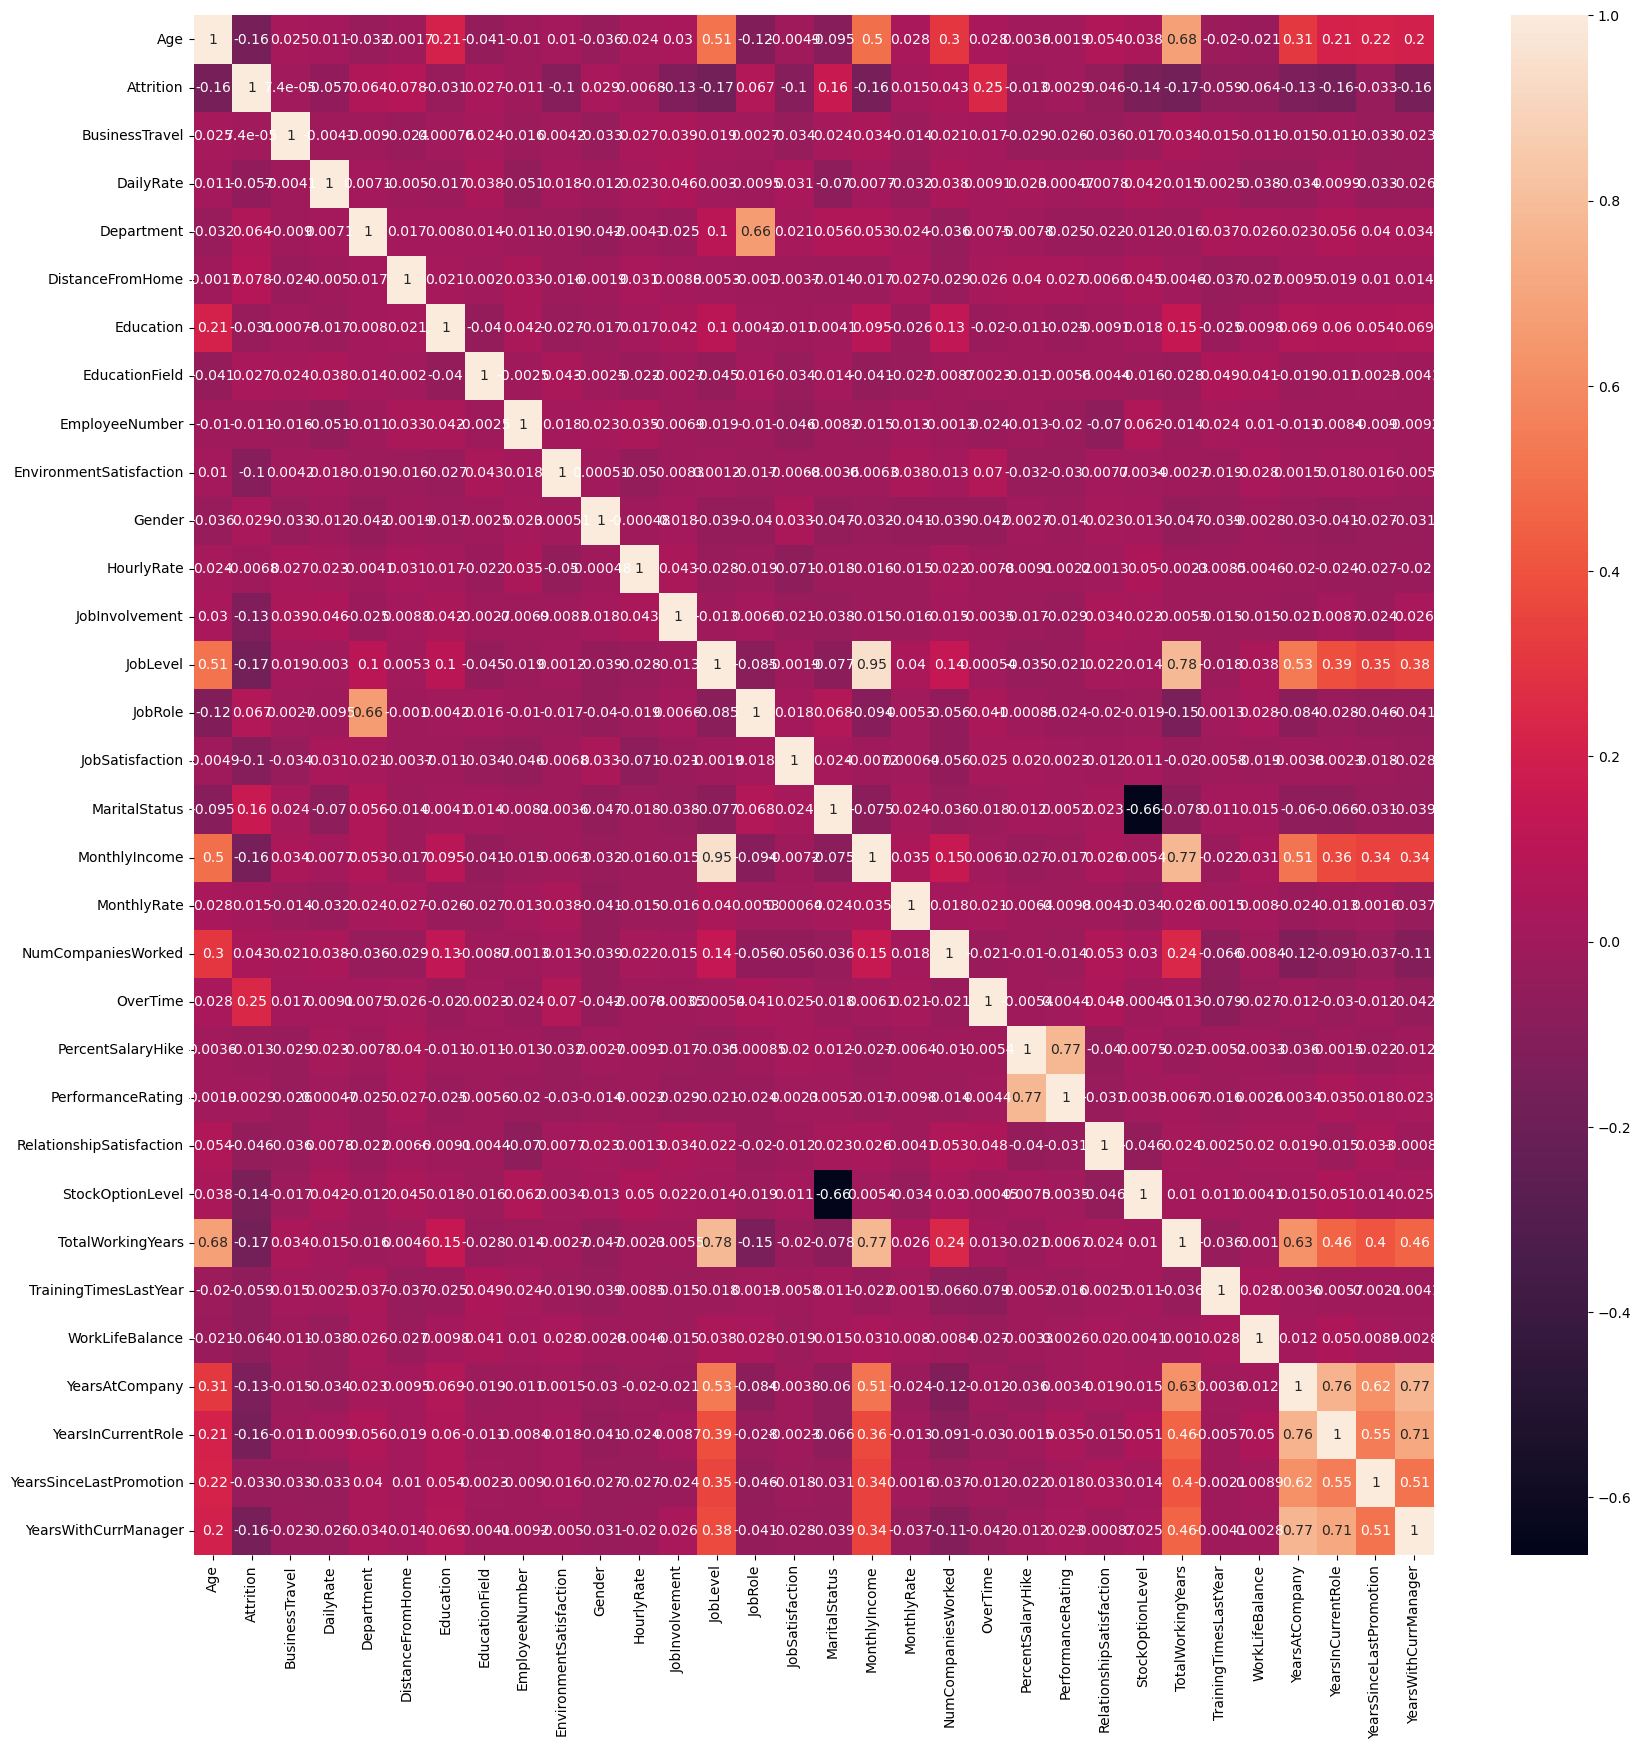

In [19]:
correlation = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)
plt.show()

In [20]:
# MinMaxScaler: This scales the data to a specific range, usually between 0 and 1. It's useful to preserve the shape of the original distribution.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df["DistanceFromHome"]=scaler.fit_transform(df["DistanceFromHome"].values.reshape(-1, 1)).flatten()
df["MonthlyIncome"]=scaler.fit_transform(df["MonthlyIncome"].values.reshape(-1, 1)).flatten()
df["NumCompaniesWorked"]=scaler.fit_transform(df["NumCompaniesWorked"].values.reshape(-1, 1)).flatten()
df["PercentSalaryHike"]=scaler.fit_transform(df["PercentSalaryHike"].values.reshape(-1, 1)).flatten()
df["TotalWorkingYears"]=scaler.fit_transform(df["TotalWorkingYears"].values.reshape(-1, 1)).flatten()
df["YearsSinceLastPromotion"]=scaler.fit_transform(df["YearsSinceLastPromotion"].values.reshape(-1, 1)).flatten()

**Plotting a Box Plot**

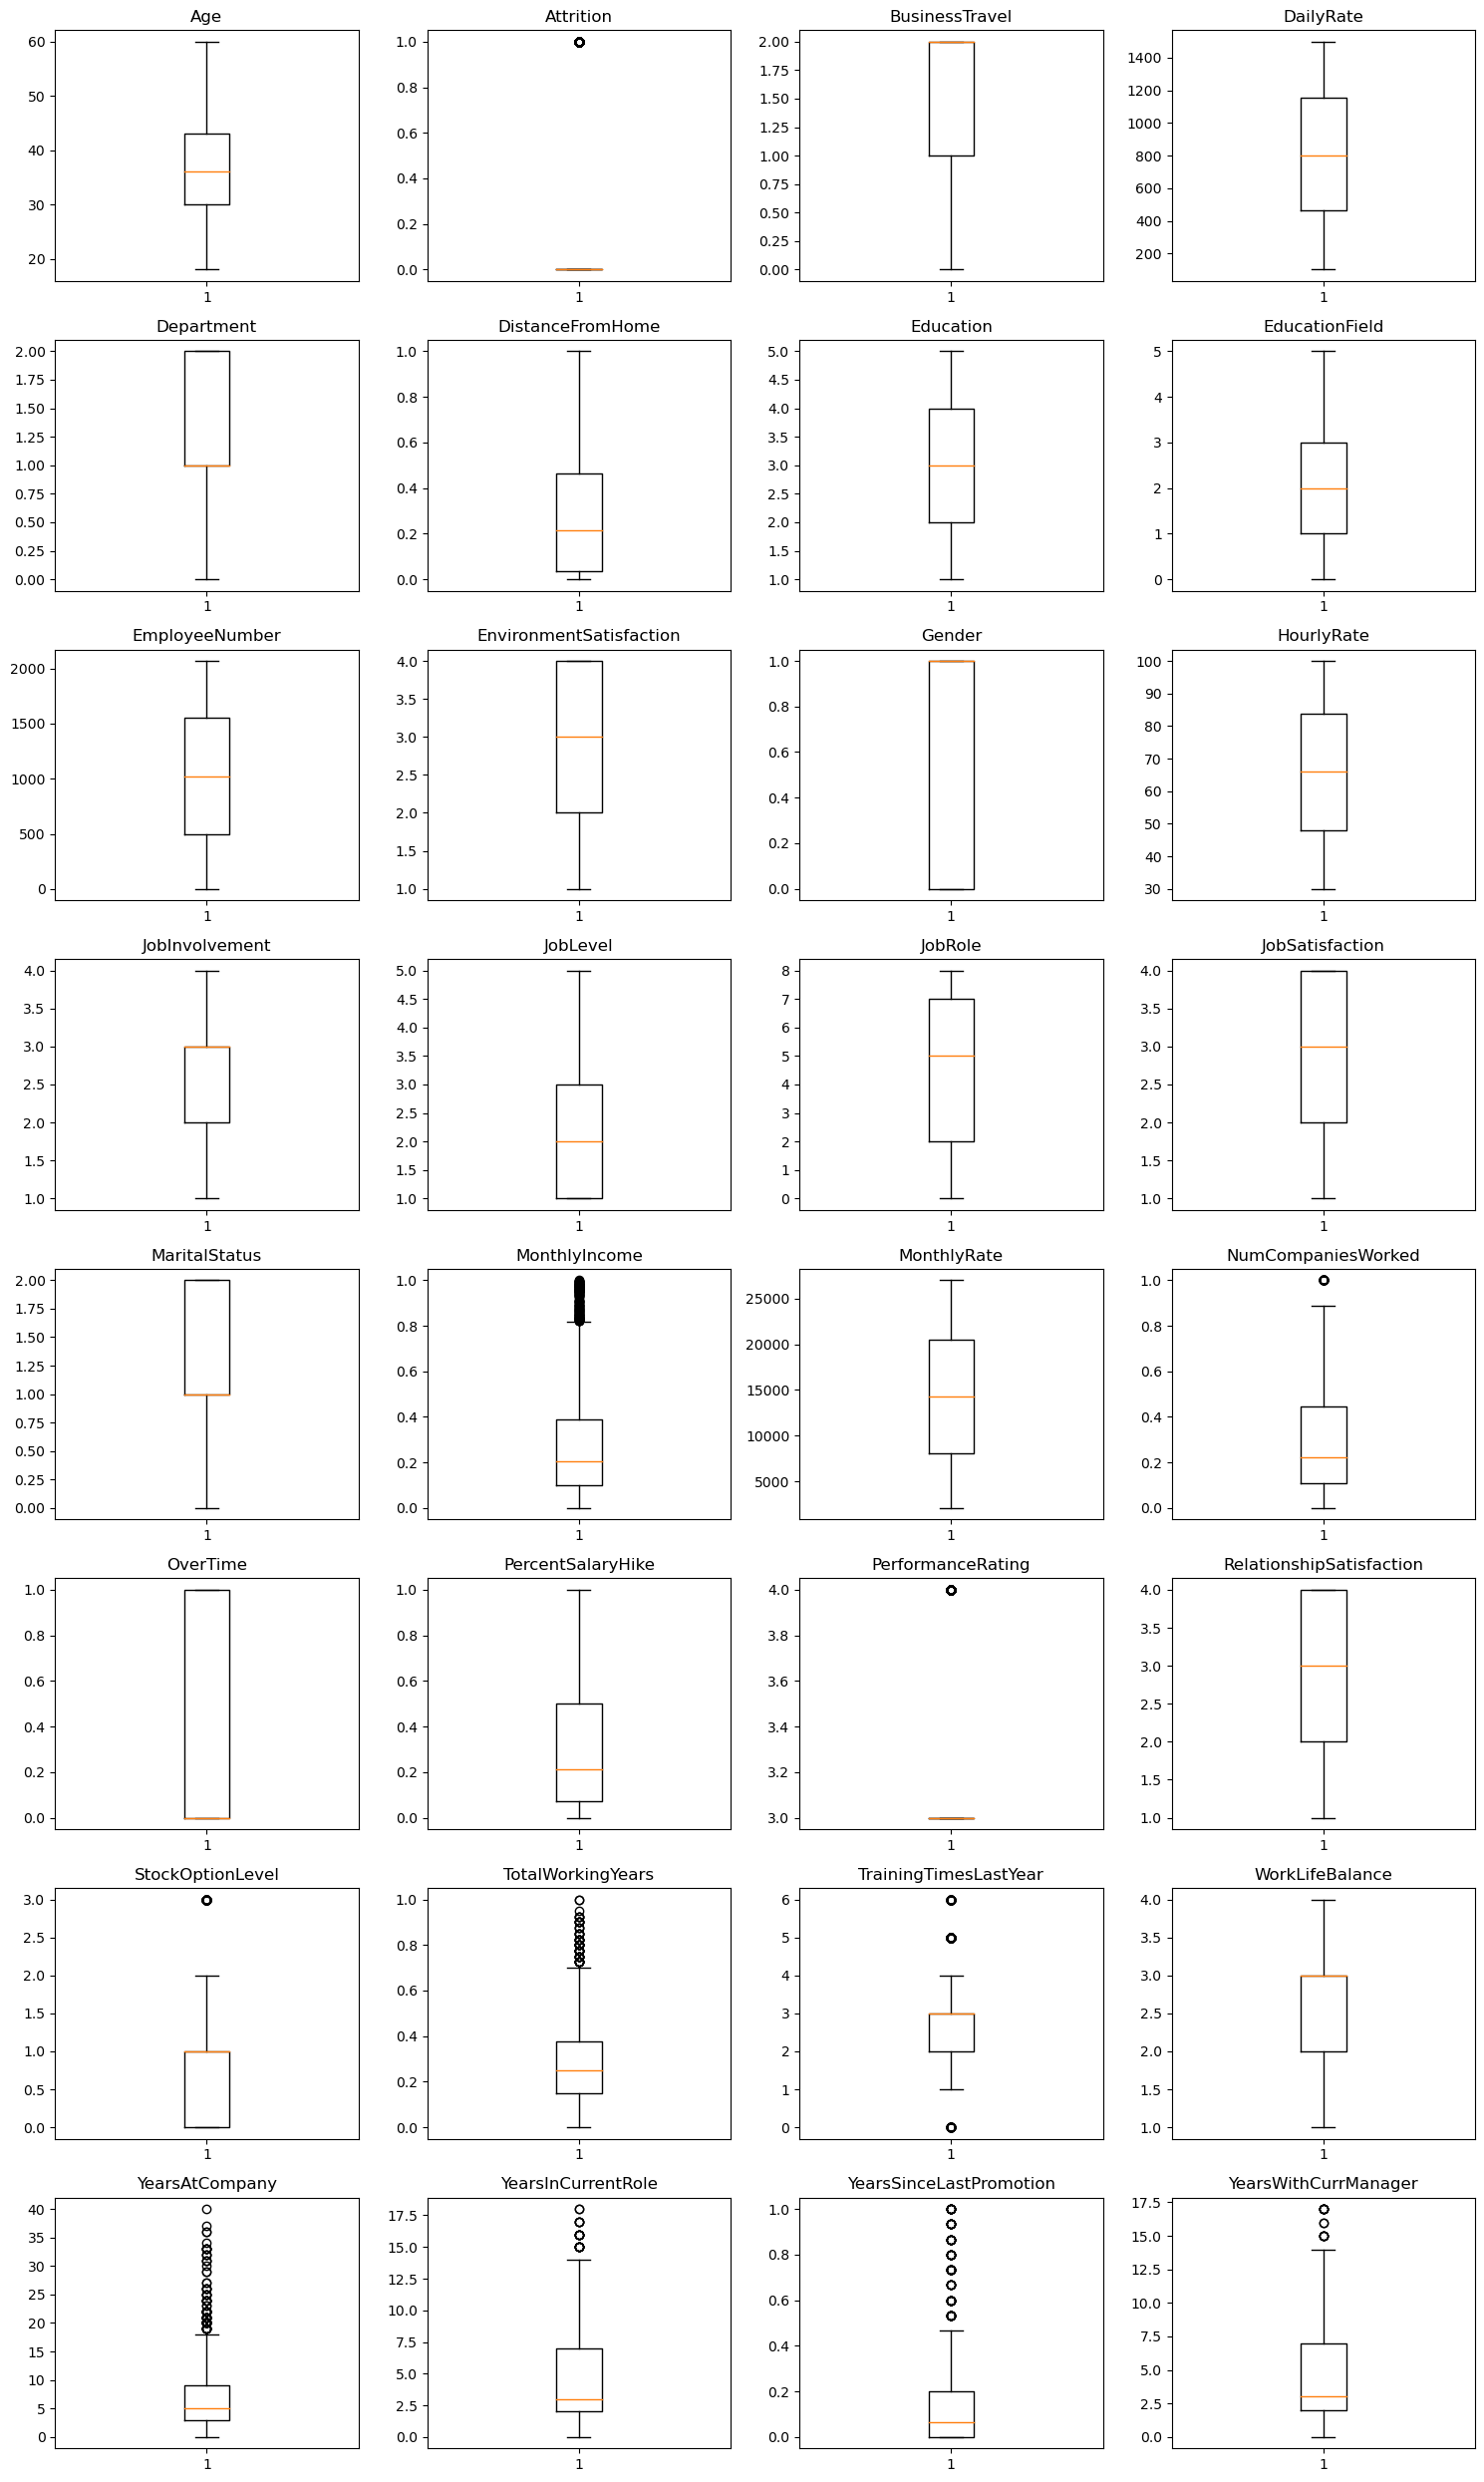

In [21]:
numeric_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15,25))
for i,column in enumerate(numeric_cols):
    plt.subplot(8,4,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.tight_layout()
plt.show()

In [22]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [23]:
cols=['MonthlyIncome','TotalWorkingYears','YearsAtCompany']
lower_bound = df[cols].quantile(0.25)
upper_bound = df[cols].quantile(0.75)

# Clip outliers for each column
for col in cols:
    df[col] = np.clip(df[col], lower_bound[col], upper_bound[col])

# Print summary statistics to verify the removal of outliers
print(df[cols].describe())

       MonthlyIncome  TotalWorkingYears  YearsAtCompany
count    1470.000000        1470.000000     1470.000000
mean        0.229049           0.250595        5.842177
std         0.114583           0.090476        2.512242
min         0.100158           0.150000        3.000000
25%         0.100158           0.150000        3.000000
50%         0.205898           0.250000        5.000000
75%         0.388060           0.375000        9.000000
max         0.388099           0.375000        9.000000


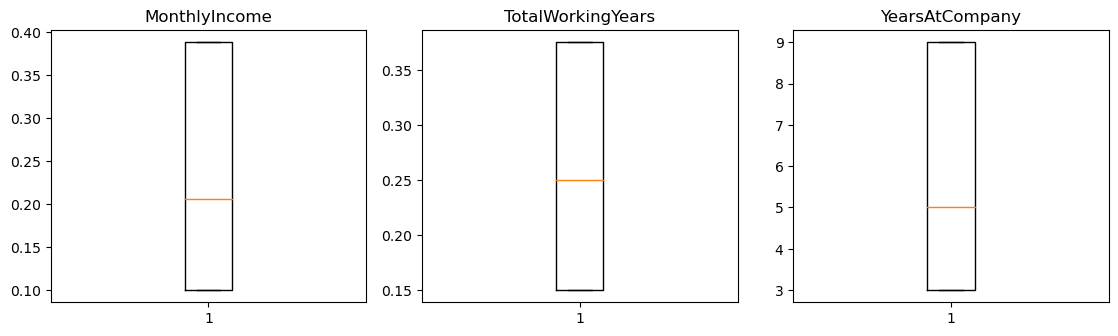

In [24]:
plt.figure(figsize=(15,25))
for i,column in enumerate(cols):
    plt.subplot(8,4,i+1)
    plt.title(column)
    plt.boxplot(df[column])
plt.tight_layout()
plt.show()

In [27]:
X=df.drop('Attrition',axis=1)
y=df['Attrition']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,roc_auc_score,roc_curve

In [31]:
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

--------------------------------------------------------------
Accuracy: 0.88
F1 Score: 0.15
Precision: 0.8
Recall: 0.08
ROC-AUC Score: 0.54
--------------------------------------------------------------


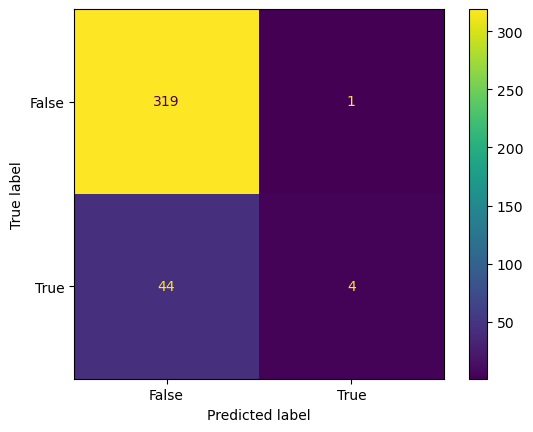

--------------------------------------------------------------
True negative: 319
False postive: 1
False negative: 44
True postive: 4
--------------------------------------------------------------


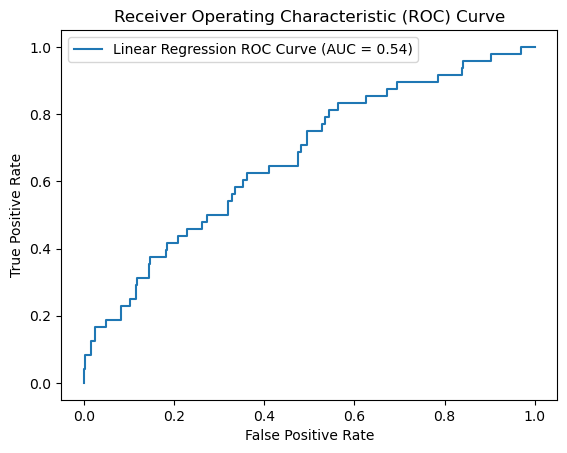

In [33]:
y_lr_pred=lr.predict(X_test)
acc_lr=round(accuracy_score(y_test,y_lr_pred),2)
f1_lr=round(f1_score(y_test,y_lr_pred),2)
precison_lr=round(precision_score(y_test,y_lr_pred),2)
recall_lr=round(recall_score(y_test,y_lr_pred),2)
roc_auc_lr=round(roc_auc_score(y_test,y_lr_pred),2)
print('--------------------------------------------------------------')
print("Accuracy:", acc_lr)
print("F1 Score:", f1_lr)
print("Precision:",precison_lr)
print("Recall:", recall_lr)
print("ROC-AUC Score:",roc_auc_lr)
print('--------------------------------------------------------------')
##############Confuion MAtrix###########################3333
cmt_lr=confusion_matrix(y_test,y_lr_pred)
bist=ConfusionMatrixDisplay(cmt_lr,display_labels=(False,True))
bist.plot()
plt.grid(False)
plt.show()
print('--------------------------------------------------------------')
tn, fp, fn, tp = cmt_lr.ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)
######################Roc-Auc Curve###################3
print('--------------------------------------------------------------')
y_lr_prob=lr.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_lr_prob)
plt.plot(fpr, tpr,label=f'Linear Regression ROC Curve (AUC = {roc_auc_lr:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**From K-Nearest Neghbour Model**

In [34]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

--------------------------------------------------------------
Accuracy: 0.83
F1 Score: 0.11
Precision: 0.17
Recall: 0.08
ROC-AUC Score: 0.51
--------------------------------------------------------------


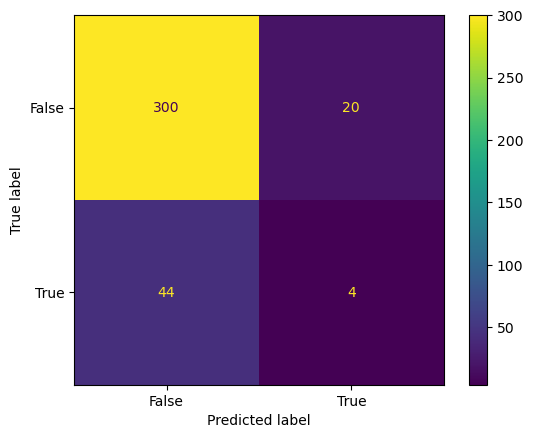

True negative: 300
False postive: 20
False negative: 44
True postive: 4
--------------------------------------------------------------


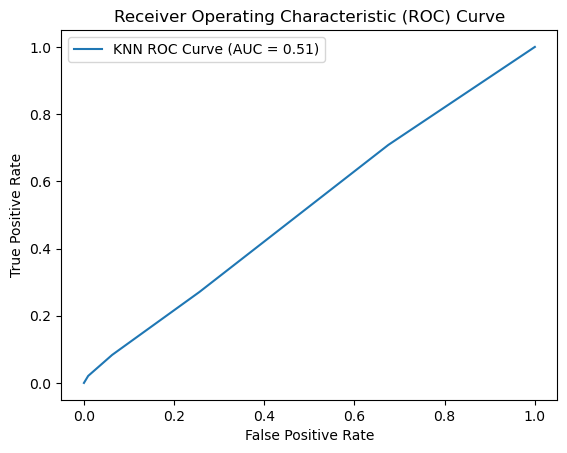

In [35]:
###############PRedicition###########################
y_knn_pred = knn.predict(X_test)
acc_knn=round(accuracy_score(y_test,y_knn_pred),2)
f1_knn=round(f1_score(y_test,y_knn_pred),2)
precison_knn=round(precision_score(y_test,y_knn_pred),2)
recall_knn=round(recall_score(y_test,y_knn_pred),2)
roc_auc_knn=round(roc_auc_score(y_test,y_knn_pred),2)
print('--------------------------------------------------------------')
print("Accuracy:", acc_knn)
print("F1 Score:", f1_knn)
print("Precision:", precison_knn)
print("Recall:", recall_knn)
print("ROC-AUC Score:",roc_auc_knn)
print('--------------------------------------------------------------')

##############Confuion MAtrix###########################3333
cmt_knn=confusion_matrix(y_test,y_knn_pred)
bist=ConfusionMatrixDisplay(cmt_knn,display_labels=(False,True))
bist.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = cmt_knn.ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)
######################Roc-Auc Curve###################3
print('--------------------------------------------------------------')

y_knn_prob=knn.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_knn_prob)
plt.plot(fpr, tpr,label=f'KNN ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

**from random forest method**

In [36]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

--------------------------------------------------------------
Accuracy: 0.88
F1 Score: 0.15
Precision: 0.67
Recall: 0.08
ROC-AUC Score: 0.54
--------------------------------------------------------------


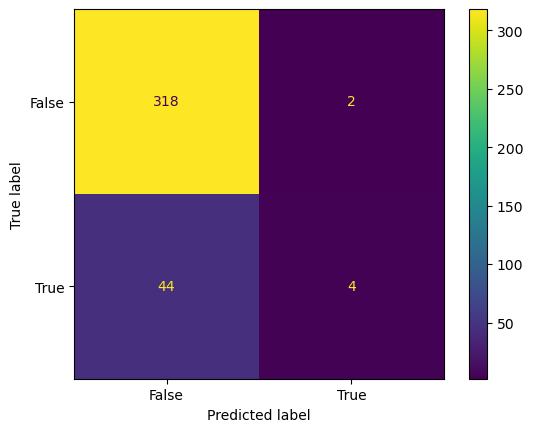

--------------------------------------------------------------
True negative: 318
False postive: 2
False negative: 44
True postive: 4
--------------------------------------------------------------


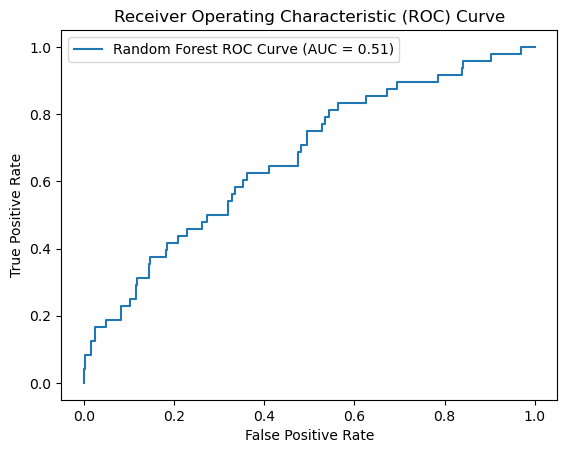

In [37]:
y_rf_pred=rf.predict(X_test)
acc_rf=round(accuracy_score(y_test,y_rf_pred),2)
f1_rf=round(f1_score(y_test,y_rf_pred),2)
precison_rf=round(precision_score(y_test,y_rf_pred),2)
recall_rf=round(recall_score(y_test,y_rf_pred),2)
roc_auc_rf=round(roc_auc_score(y_test,y_rf_pred),2)
print('--------------------------------------------------------------')
print("Accuracy:", acc_rf)
print("F1 Score:", f1_rf)
print("Precision:", precison_rf)
print("Recall:", recall_rf)
print("ROC-AUC Score:",roc_auc_rf)
print('--------------------------------------------------------------')
##############Confuion MAtrix###########################3333
cmt_rf=confusion_matrix(y_test,y_rf_pred)
bist=ConfusionMatrixDisplay(cmt_rf,display_labels=(False,True))
bist.plot()
plt.grid(False)
plt.show()
print('--------------------------------------------------------------')
tn, fp, fn, tp = cmt_rf.ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)
######################Roc-Auc Curve###################3
print('--------------------------------------------------------------')
y_rf_prob=rf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_lr_prob)
plt.plot(fpr, tpr,label=f'Random Forest ROC Curve (AUC = {roc_auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [38]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

--------------------------------------------------------------
Accuracy: 0.83
F1 Score: 0.41
Precision: 0.37
Recall: 0.46
ROC-AUC Score: 0.67
--------------------------------------------------------------


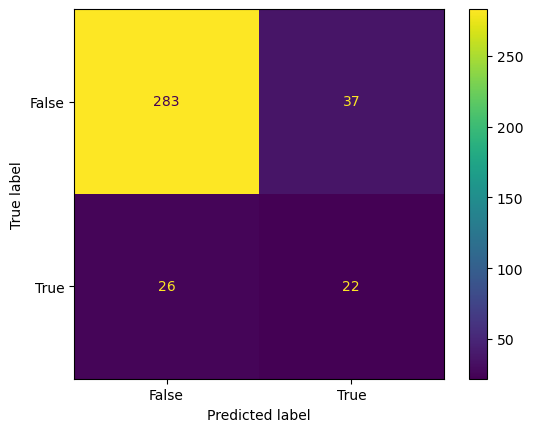

True negative: 283
False postive: 37
False negative: 26
True postive: 22
--------------------------------------------------------------


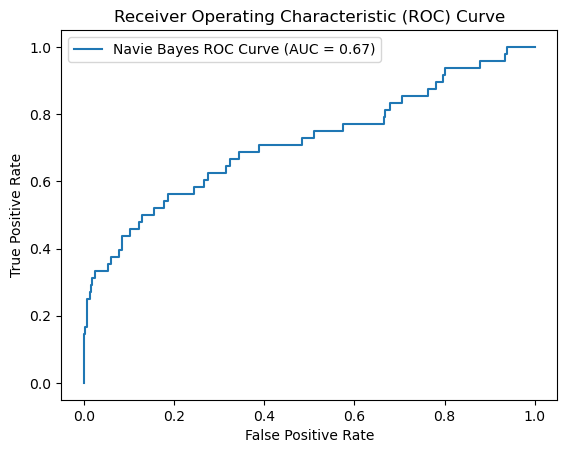

In [39]:
###############PRedicition###########################
y_nb_pred = nb.predict(X_test)
acc_nb=round(accuracy_score(y_test,y_nb_pred),2)
f1_nb=round(f1_score(y_test,y_nb_pred),2)
precison_nb=round(precision_score(y_test,y_nb_pred),2)
recall_nb=round(recall_score(y_test,y_nb_pred),2)
roc_auc_nb=round(roc_auc_score(y_test,y_nb_pred),2)
print('--------------------------------------------------------------')
print("Accuracy:", acc_nb)
print("F1 Score:", f1_nb)
print("Precision:", precison_nb)
print("Recall:", recall_nb)
print("ROC-AUC Score:",roc_auc_nb)
print('--------------------------------------------------------------')
##############Confuion MAtrix###########################3333
cmt_nb=confusion_matrix(y_test,y_nb_pred)
bist=ConfusionMatrixDisplay(cmt_nb,display_labels=(False,True))
bist.plot()
plt.grid(False)
plt.show()

tn, fp, fn, tp = cmt_nb.ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)
######################Roc-Auc Curve###################3
print('--------------------------------------------------------------')
y_nb_prob=nb.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_nb_prob)
plt.plot(fpr, tpr,label=f'Navie Bayes ROC Curve (AUC = {roc_auc_nb:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [42]:
d1={'Accuracy':[acc_knn,acc_lr,acc_nb,acc_rf],
      "Precision":[precison_knn,precison_lr,precison_nb,precison_rf],
      "Recall":[recall_knn,recall_lr,recall_nb,recall_rf],
      "F1-score":[f1_knn,f1_lr,f1_nb,f1_rf],
       "ROC-AUC Score ":[roc_auc_knn,roc_auc_lr,roc_auc_nb,roc_auc_rf]}

pd.DataFrame(d1,index=['KNN','Logistic','Naive Bayes','Random Forest'])

,Accuracy,Precision,Recall,F1-score,ROC-AUC Score
KNN,0.83,0.17,0.08,0.11,0.51
Logistic,0.88,0.80,0.08,0.15,0.54
Naive Bayes,0.83,0.37,0.46,0.41,0.67
Random Forest,0.88,0.67,0.08,0.15,0.54


**With hyper parameter**

In [43]:
rfc=RandomForestClassifier()

In [44]:
param_grid_rf= {
    'n_estimators': [100, 200],
    "criterion":['gini','entropy'],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

grid_search = GridSearchCV(rfc,  # Base modl
                           param_grid_rf, # params 
                           scoring='accuracy', # metric
                           cv=5,
                          verbose=True)



In [45]:
import time
start = time.time()

grid_search.fit(X_train,y_train)

end=time.time()

print("toal time taken is ",(end-start))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
toal time taken is  274.02248668670654


In [46]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'n_estimators': 100,
 'random_state': 42}

In [47]:
grid_search.best_score_

0.856606334841629

In [68]:
drf=RandomForestClassifier(criterion='gini',
                          max_depth=5,
                          max_features='sqrt',
                          n_estimators=100,
                          random_state=42)


In [69]:
drf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

accuray is: 88.04
F1 is: 0.15
Precision is: 1.0
Recall is: 0.08
ROC-Auc curve is 0.54


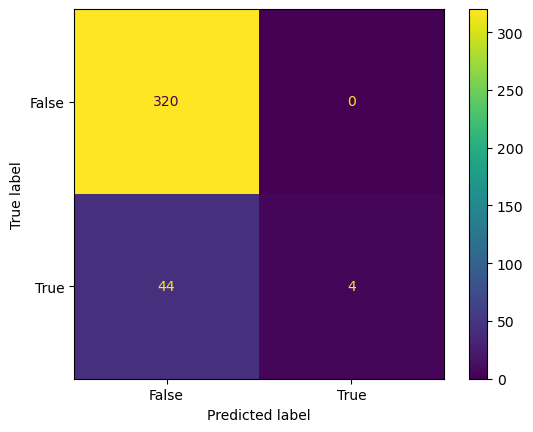

True negative: 320
False postive: 0
False negative: 44
True postive: 4


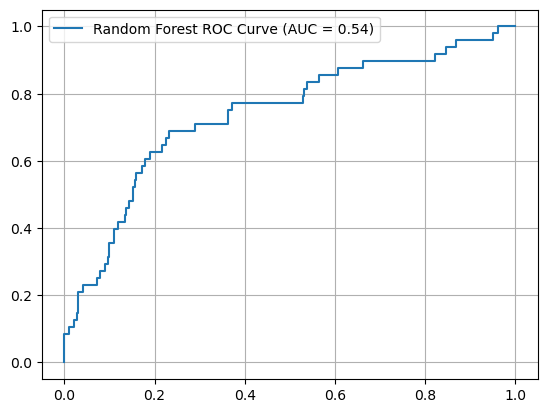

In [70]:
y_pred_RF=drf.predict(X_test)

#=====================================All prediction=============================================================
acc_RF= round(accuracy_score(y_test,y_pred_RF)*100,2)
f1_RF=round(f1_score(y_test,y_pred_RF),2)
precision_RF=round(precision_score(y_test,y_pred_RF),2)
recall_RF=round(recall_score(y_test,y_pred_RF),2)
roc_auc_RF=round(roc_auc_score(y_test,y_pred_RF),2)
print("accuray is:",acc_RF)
print("F1 is:",f1_RF)
print("Precision is:",precision_RF)
print("Recall is:",recall_RF)
print("ROC-Auc curve is",roc_auc_RF)

# ================================:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_RF)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RF).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#======================================= ROC-AUC curve================================================================

y_RF_pred_prob=drf.predict_proba(X_test)[:,1] 
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr,label=f'Random Forest ROC Curve (AUC = {roc_auc_RF:.2f})')
plt.legend()
plt.grid()
plt.show()


In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt

DecisionTreeClassifier()

In [53]:
param_grid = {
    "criterion":['gini','entropy'],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

grid_search_dt=GridSearchCV(dt,param_grid,scoring='accuracy',cv=5,verbose = True)



In [54]:
grid_search_dt.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [55]:
grid_search_dt.best_score_

0.8393541752365282

In [56]:
grid_search_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 42}

In [71]:
dt_p = DecisionTreeClassifier(criterion='entropy',
                              max_depth=5,
                              min_samples_leaf=1,
                              min_samples_split=2,
                              random_state=42)
dt_p.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

accuray is: 84.24
F1 is: 0.26
Precision is: 0.33
Recall is: 0.21
ROC-Auc curve is 0.54


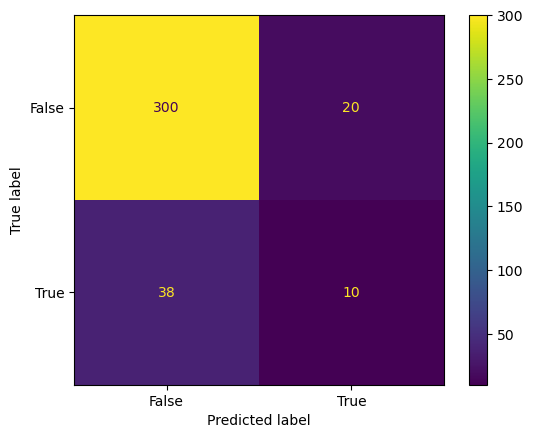

True negative: 300
False postive: 20
False negative: 38
True postive: 10


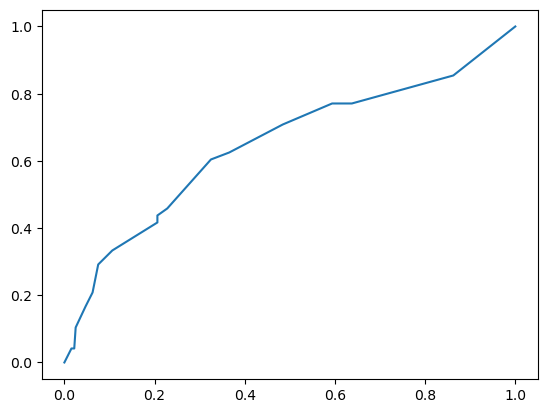

In [72]:
y_pred_dt=dt_p.predict(X_test)
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt),2)
precision_dt=round(precision_score(y_test,y_pred_dt),2)
recall_dt=round(recall_score(y_test,y_pred_dt),2)
roc_auc_dt=round(roc_auc_score(y_test,y_pred_RF),2)


print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print("ROC-Auc curve is",roc_auc_dt)
# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_dt)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_dt).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================Step-8: ROC-AUC curve================================================================

y_RF_pred_prob=dt_p.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_RF_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

**KNN**

In [73]:
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [74]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30, 40],  # applicable for ball_tree or kd_tree algorithms
    'metric': ['minkowski', 'chebyshev', 'manhattan', 'euclidean'],
    'n_jobs': [-1],  # for parallel processing, -1 means using all available processors
}

In [75]:
grid_search_knn=GridSearchCV(knn,param_grid,scoring='accuracy',cv=5)

In [76]:
start = time.time()

grid_search_knn.fit(X_train,y_train)


end=time.time()

print("toal time taken is ",(end-start))

toal time taken is  255.99502539634705


In [77]:
grid_search_knn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'n_jobs': -1,
 'n_neighbors': 9,
 'p': 1,
 'weights': 'uniform'}

In [78]:
best_knn = grid_search_knn.best_estimator_
accuracy = best_knn.score(X_test, y_test)
print("Test Set Accuracy:", accuracy)

Test Set Accuracy: 0.8559782608695652


In [79]:
knn_f = KNeighborsClassifier(
    algorithm='ball_tree',
    leaf_size=10,
    metric='chebyshev',
    n_jobs=-1,
    n_neighbors=9,
    p=1,
    weights='uniform'
)

In [80]:
knn_f.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=10, metric='chebyshev',
                     n_jobs=-1, n_neighbors=9, p=1)

accuray is: 85.6
F1 is: 0.04
Precision is: 0.14
Recall is: 0.02
ROC-Auc curve is 0.5


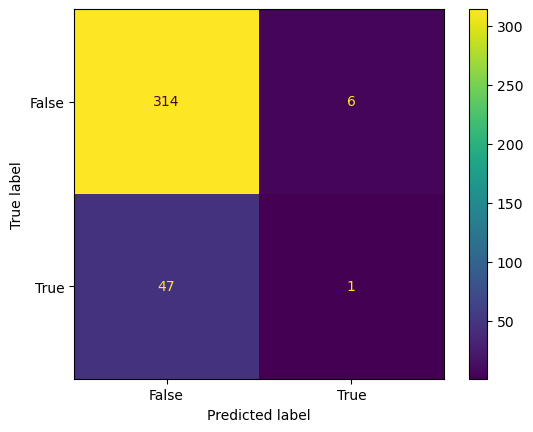

True negative: 314
False postive: 6
False negative: 47
True postive: 1


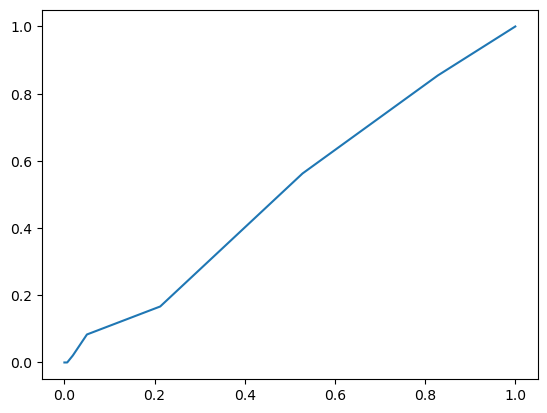

In [81]:
y_pred_knn=knn_f.predict(X_test)
acc_knn= round(accuracy_score(y_test,y_pred_knn)*100,2)
f1_knn=round(f1_score(y_test,y_pred_knn),2)
precision_knn=round(precision_score(y_test,y_pred_knn),2)
recall_knn=round(recall_score(y_test,y_pred_knn),2)
roc_auc_knn=round(roc_auc_score(y_test,y_pred_knn),2)


print("accuray is:",acc_knn)
print("F1 is:",f1_knn)
print("Precision is:",precision_knn)
print("Recall is:",recall_knn)
print("ROC-Auc curve is",roc_auc_knn)
# ================================Step-7:Confusion matrix=========================================================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_knn)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()


tn, fp, fn, tp = confusion_matrix(y_test,y_pred_knn).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)

#=======================================ROC-AUC curve================================================================

y_knn_pred_prob=knn_f.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_knn_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [82]:
grid_log=LogisticRegression()
grid_log

LogisticRegression()

In [83]:
log_grid = {
    'C': [1.0, 10.0, 100.0,'entropy'],  # Replace with a range of values or specific values for 'C'
    'intercept_scaling': [4, 6, 7, 8, 9, 10],
    'fit_intercept': [True],
    'warm_start': [False],
    'max_iter': [100, 200, 300,1000]  # Replace with a range of values or specific values for 'max_iter'
}

In [84]:
grid_search = GridSearchCV(grid_log,  # Base model
                           log_grid,  # Parameters
                           scoring='accuracy',  # Metric
                           cv=4,
                           verbose=True)

In [85]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10.0, 100.0, 'entropy'],
                         'fit_intercept': [True],
                         'intercept_scaling': [4, 6, 7, 8, 9, 10],
                         'max_iter': [100, 200, 300, 1000],
                         'warm_start': [False]},
             scoring='accuracy', verbose=True)

In [88]:
grid_search.best_params_

{'C': 1.0,
 'fit_intercept': True,
 'intercept_scaling': 4,
 'max_iter': 1000,
 'warm_start': False}

In [91]:
log = LogisticRegression(C=1.0,
                         fit_intercept=True,
                         intercept_scaling=4,
                         max_iter=1000,
                         warm_start=False)

In [95]:
log.fit(X_train, y_train)

LogisticRegression(intercept_scaling=4, max_iter=1000)

In [96]:
y_pred_log = log.predict(X_test)

accuray is: 88.59
F1 is: 0.3
Precision is: 0.75
Recall is: 0.19
Roc is: 0.59


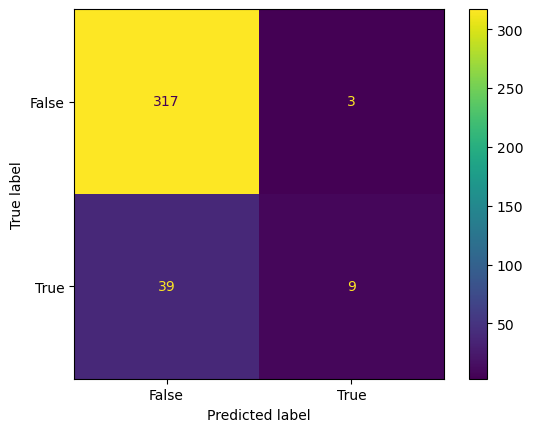

True negative: 317
False postive: 3
False negative: 39
True postive: 9


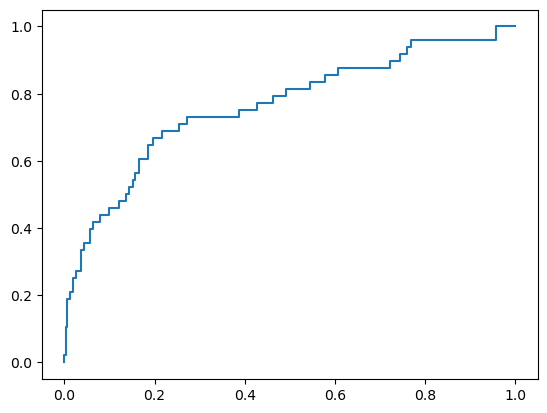

In [97]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
acc_log= round(accuracy_score(y_test,y_pred_log)*100,2)
f1_log=round(f1_score(y_test,y_pred_log),2)
precision_log=round(precision_score(y_test,y_pred_log),2)
recall_log=round(recall_score(y_test,y_pred_log),2)
roc_auc_log=round(roc_auc_score(y_test,y_pred_log),2)
print("accuray is:",acc_log)
print("F1 is:",f1_log)
print("Precision is:",precision_log)
print("Recall is:",recall_log)
print("Roc is:",roc_auc_log)
#====================================================Confusion matrix=====================================
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cmt=confusion_matrix(y_test,y_pred_log)

disp=ConfusionMatrixDisplay(confusion_matrix=cmt,
                            display_labels = [False, True])
disp.plot()
plt.grid(False)
plt.show()



tn, fp, fn, tp = confusion_matrix(y_test,y_pred_log).ravel()
print("True negative:",tn)
print("False postive:",fp)
print("False negative:",fn)
print("True postive:",tp)
#====================================================probability=====================================
y_log_pred_prob=log.predict_proba(X_test)[:,1]   # Class-1 probabilities
fpr,tpr,threshold=roc_curve(y_test,y_log_pred_prob) 
plt.plot(fpr,tpr)
plt.show()

In [98]:
dict1={'Accuracy':[acc_RF,acc_knn,acc_log,acc_dt],
      "Precision":[precision_RF,precision_knn,precision_log,precision_dt],
      "Recall":[recall_RF,recall_knn,recall_log,recall_dt],
    "F1-score":[f1_RF,f1_knn,f1_log,f1_dt]}

pd.DataFrame(dict1,index=['Random Forest','K nearest Neighbour','Logistic Regression ','Decison tree'])

,Accuracy,Precision,Recall,F1-score
Random Forest,88.04,1.00,0.08,0.15
K nearest Neighbour,85.60,0.14,0.02,0.04
Logistic Regression,88.59,0.75,0.19,0.30
Decison tree,84.24,0.33,0.21,0.26
